# Covid-19 data visualization

Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import os


Import data

In [2]:
w4_sub = pd.read_csv('./covid19-global-forecasting-week-4/submission.csv')
w4_test = pd.read_csv('./covid19-global-forecasting-week-4/test.csv')
w4_train = pd.read_csv('./covid19-global-forecasting-week-4/train.csv')

print(w4_train.head())

   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0


Describe the data

In [3]:
desc = w4_train.describe() 
print(desc)

                 Id  ConfirmedCases    Fatalities
count  35995.000000    35995.000000  35995.000000
mean   17998.000000     3683.508737    243.560217
std    10391.005806    18986.978708   1832.966999
min        1.000000        0.000000      0.000000
25%     8999.500000        0.000000      0.000000
50%    17998.000000       19.000000      0.000000
75%    26996.500000      543.000000      7.000000
max    35995.000000   345813.000000  33998.000000


In [4]:
w4_train_conf=w4_train[['Country_Region','Date','ConfirmedCases']]
print(w4_train_conf.head())
date_index=w4_train_conf['Date'].unique()

  Country_Region        Date  ConfirmedCases
0    Afghanistan  2020-01-22             0.0
1    Afghanistan  2020-01-23             0.0
2    Afghanistan  2020-01-24             0.0
3    Afghanistan  2020-01-25             0.0
4    Afghanistan  2020-01-26             0.0


In [5]:
w4_confirmedCases = w4_train[w4_train.columns[-2]].sum()
w4_Fatalities = w4_train[w4_train.columns[-1]].sum()


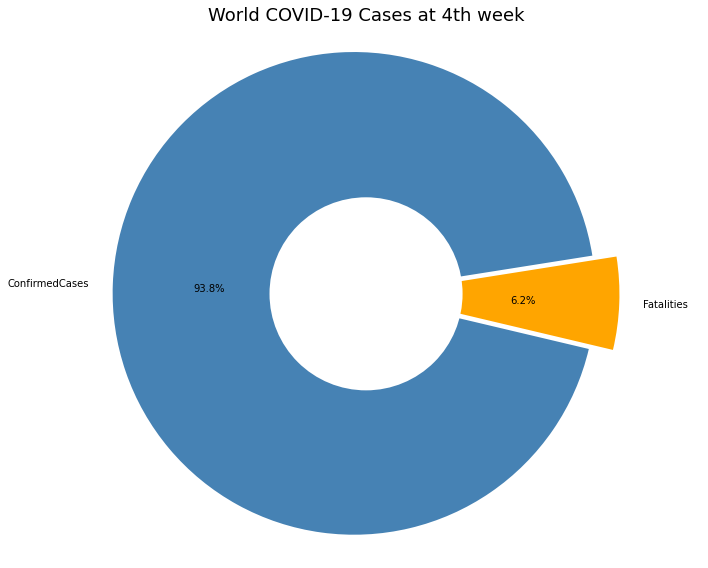

In [6]:
labels = ['ConfirmedCases','Fatalities']
sizes = [w4_confirmedCases, w4_Fatalities]
color= ['steelblue','orange']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode, colors = color)
centre_circle = plt.Circle((0,0),0.40,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases at 4th week',fontsize = 18)
plt.axis('equal')  
plt.tight_layout()

In [7]:
#Group data
w4_train_coutry= w4_train.groupby('Country_Region').sum().reset_index()

w4_train_date= w4_train.groupby('Date').sum().reset_index()

print(w4_train_date)

           Date       Id  ConfirmedCases  Fatalities
0    2020-01-22  5615533           554.0        17.0
1    2020-01-23  5615846           653.0        18.0
2    2020-01-24  5616159           939.0        26.0
3    2020-01-25  5616472          1432.0        42.0
4    2020-01-26  5616785          2113.0        56.0
..          ...      ...             ...         ...
110  2020-05-11  5649963       4176589.0    286293.0
111  2020-05-12  5650276       4260955.0    291924.0
112  2020-05-13  5650589       4345950.0    297155.0
113  2020-05-14  5650902       4440974.0    302370.0
114  2020-05-15  5651215       4540926.0    307611.0

[115 rows x 4 columns]


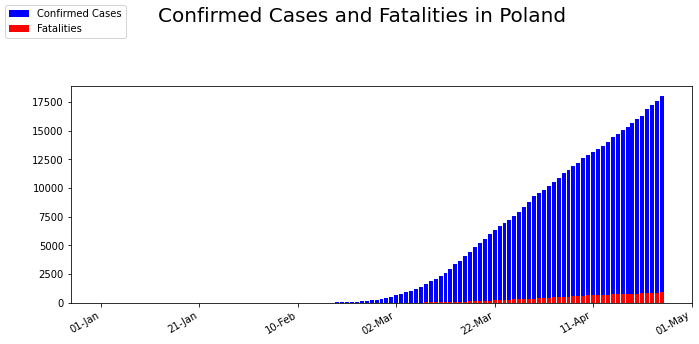

In [8]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

#one country and data
w4_tr_Pol=w4_train[w4_train['Country_Region'].str.contains("Poland")]

fig = plt.figure(figsize= (10,5))
plt.suptitle('Confirmed Cases and Fatalities in Poland',fontsize = 20, y=1.0)

ax = fig.add_subplot(1,1,1)

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

ax.bar(w4_tr_Pol['Date'],w4_tr_Pol['ConfirmedCases'],color = 'blue',alpha =1,label = 'Confirmed Cases');
ax.bar(w4_tr_Pol['Date'],w4_tr_Pol['Fatalities'],color='red',label = 'Fatalities');
ax.set_autoscale_on(True)
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper left')

#rotate date labels
fig.autofmt_xdate()

plt.tight_layout(pad=3.0)

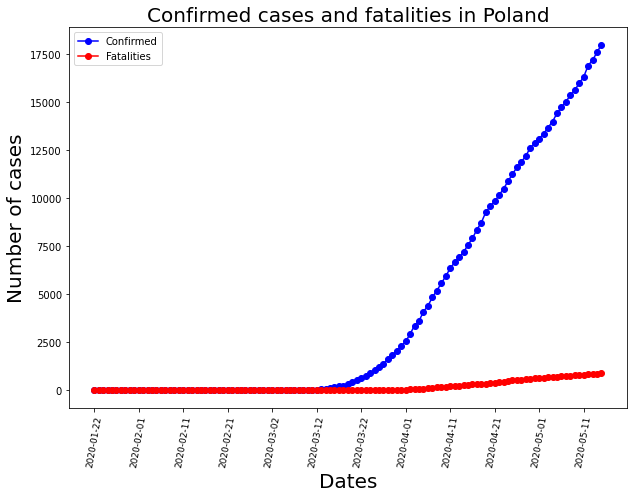

In [9]:
plt.figure(figsize= (10,7))

plt.xticks(np.arange(0, 1000, step=10), rotation = 80 ,fontsize = 9)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Number of cases',fontsize = 20)
plt.title("Confirmed cases and fatalities in Poland" , fontsize = 20)

ax1 = plt.plot_date(y= w4_tr_Pol['ConfirmedCases'],x= w4_tr_Pol['Date'],label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= w4_tr_Pol['Fatalities'],x= w4_tr_Pol['Date'],label = 'Fatalities',linestyle ='-',color = 'r')



plt.legend();

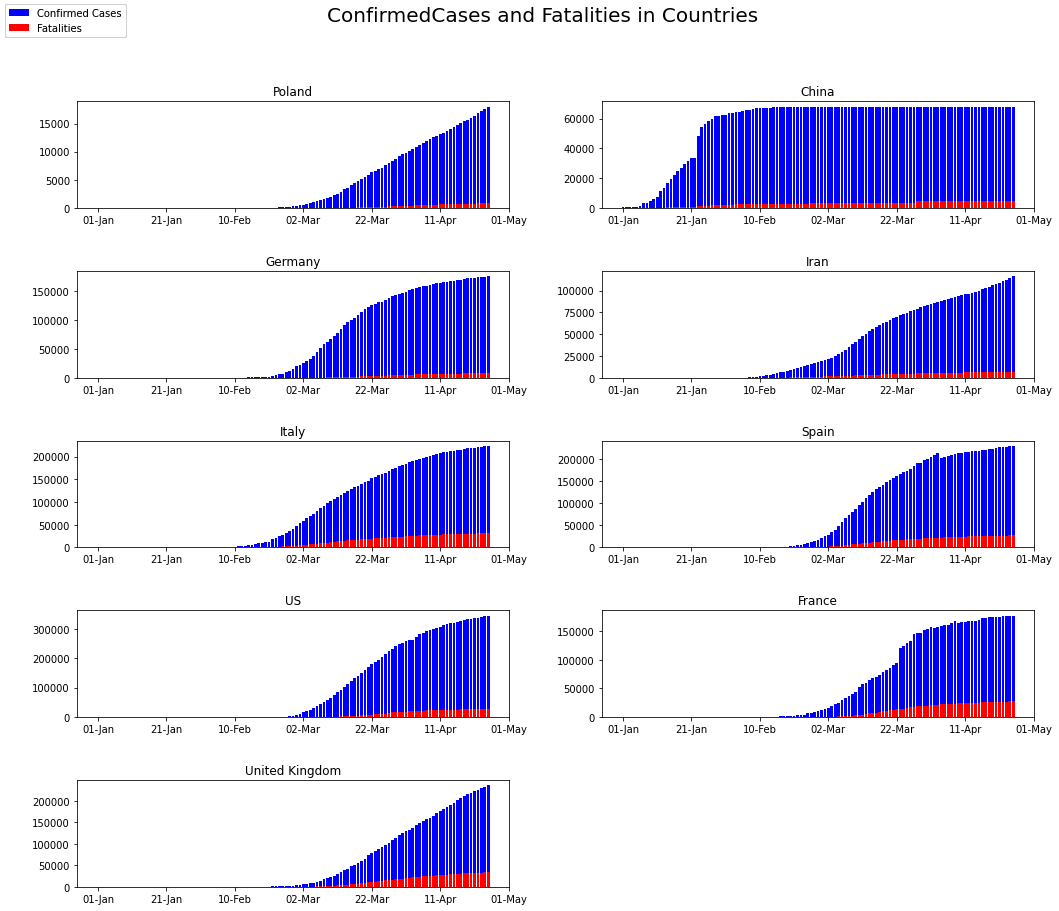

In [10]:
countrys = ['Poland', 'China','Germany','Iran','Italy','Spain','US','France','United Kingdom']

 
fig = plt.figure(figsize= (15,15))
plt.suptitle('ConfirmedCases and Fatalities in Countries',fontsize = 20,y=1.0)
#plt.legend()

k=0
for i in range(1,10):
    w4_tr_cou=w4_train[w4_train['Country_Region'].str.contains(countrys[k])]

    ax = fig.add_subplot(6,2,i)
    
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    ax.bar(w4_tr_cou['Date'],w4_tr_cou['ConfirmedCases'],color = 'blue',alpha =1,label = 'Confirmed Cases');
    ax.bar(w4_tr_cou['Date'],w4_tr_cou['Fatalities'],color='red',label = 'Fatalities');
    ax.set_autoscale_on(True)

    plt.title(countrys[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

[482946.0, 7946795.0, 7080489.0, 4358781.0, 9386990.0, 9322515.0, 39749076.0, 6749906.0, 6360259.0]


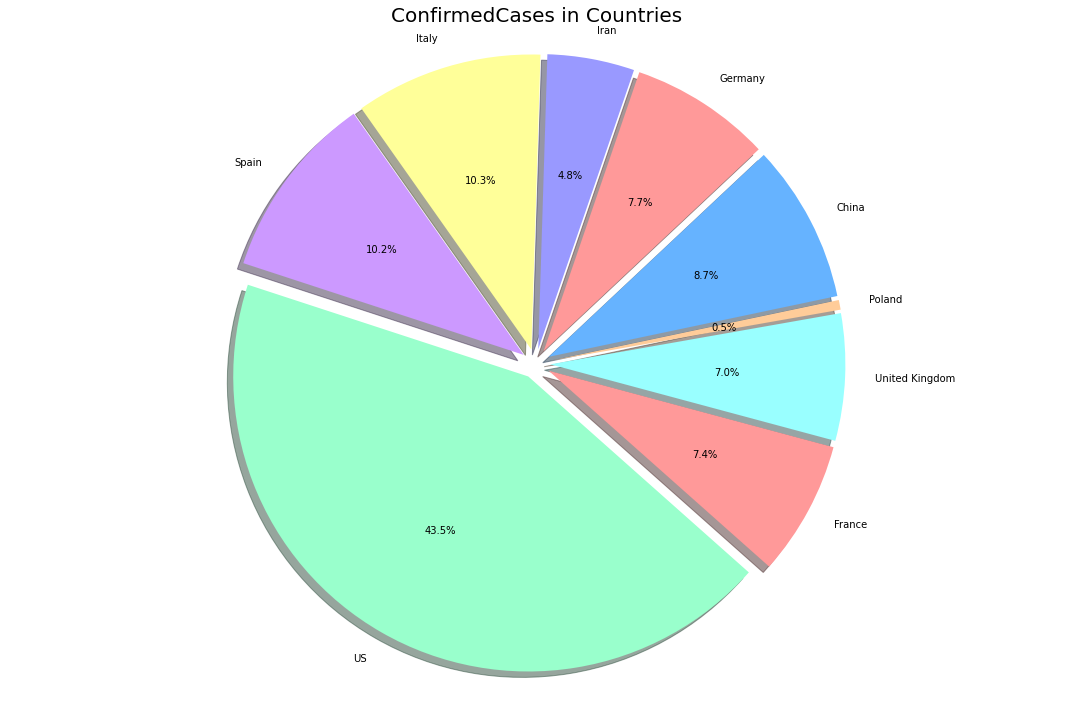

In [11]:
countries = ['Poland', 'China','Germany','Iran','Italy','Spain','US','France','United Kingdom']
sizes = []
explode=[]

k=0
for i in range(1,10):
    w4_tr_cou=w4_train[w4_train['Country_Region'].str.contains(countries[k])]
    
    sizes.append(w4_tr_cou['ConfirmedCases'].sum())
    explode.append(0.05)
    k=k+1
    
print(sizes)

colors = ['#ffcc99','#66b3ff','#ff9999','#9999FF', '#FFFF99','#CC99FF', '#99FFCC', '#FF9999', '#99FFFF']

plt.figure(figsize= (15,10))
plt.title('ConfirmedCases in Countries',fontsize = 20)
plt.pie(sizes, explode=explode, labels=countries, colors=colors, autopct='%1.1f%%',shadow=True, startangle=10)
plt.axis('equal')
plt.tight_layout()



In [12]:
data_conf = pd.pivot_table(w4_train, values='ConfirmedCases', 
                     index=['Country_Region'], 
                     columns='Date')

C:\Users\Weronika\Anaconda3\envs\n4\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


[Text(0, 0.5, 'Afghanistan'),
 Text(0, 2.5, 'Algeria'),
 Text(0, 4.5, 'Angola'),
 Text(0, 6.5, 'Argentina'),
 Text(0, 8.5, 'Australia'),
 Text(0, 10.5, 'Azerbaijan'),
 Text(0, 12.5, 'Bahrain'),
 Text(0, 14.5, 'Barbados'),
 Text(0, 16.5, 'Belgium'),
 Text(0, 18.5, 'Benin'),
 Text(0, 20.5, 'Bolivia'),
 Text(0, 22.5, 'Botswana'),
 Text(0, 24.5, 'Brunei'),
 Text(0, 26.5, 'Burkina Faso'),
 Text(0, 28.5, 'Burundi'),
 Text(0, 30.5, 'Cambodia'),
 Text(0, 32.5, 'Canada'),
 Text(0, 34.5, 'Chad'),
 Text(0, 36.5, 'China'),
 Text(0, 38.5, 'Congo (Brazzaville)'),
 Text(0, 40.5, 'Costa Rica'),
 Text(0, 42.5, 'Croatia'),
 Text(0, 44.5, 'Cyprus'),
 Text(0, 46.5, 'Denmark'),
 Text(0, 48.5, 'Djibouti'),
 Text(0, 50.5, 'Dominican Republic'),
 Text(0, 52.5, 'Egypt'),
 Text(0, 54.5, 'Equatorial Guinea'),
 Text(0, 56.5, 'Estonia'),
 Text(0, 58.5, 'Ethiopia'),
 Text(0, 60.5, 'Finland'),
 Text(0, 62.5, 'Gabon'),
 Text(0, 64.5, 'Georgia'),
 Text(0, 66.5, 'Ghana'),
 Text(0, 68.5, 'Grenada'),
 Text(0, 70.5, 'Guin

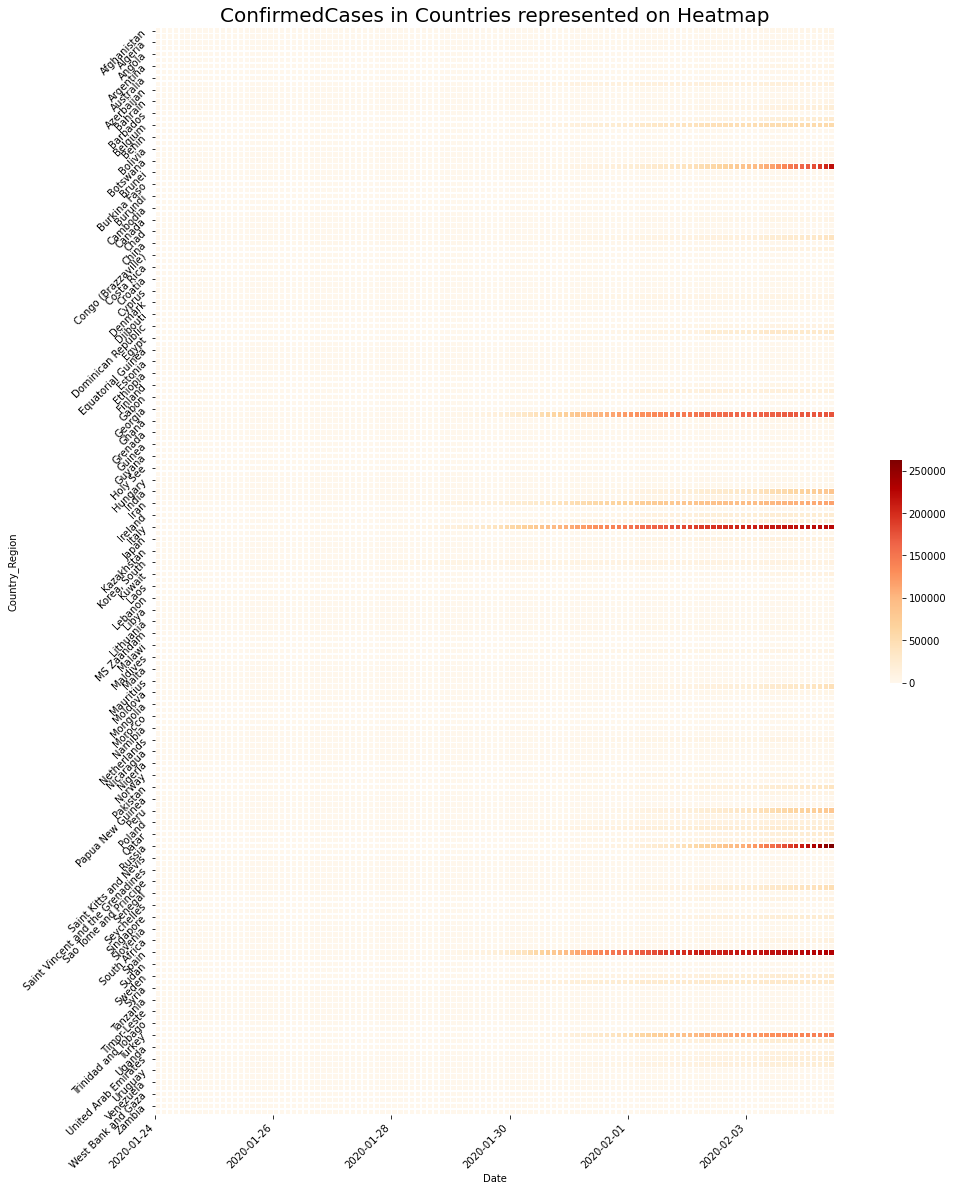

In [16]:
plt.figure(figsize=(20,20))
plt.title('ConfirmedCases in Countries represented on Heatmap',fontsize = 20)

g = sns.heatmap(
    data_conf, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=0.5
)


g.xaxis.set_major_locator(MultipleLocator(20))
g.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

In [14]:
cases = w4_train.groupby('Country_Region')['ConfirmedCases','Fatalities'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
cases['ConfirmedCases'] = cases['ConfirmedCases']
cases["Fatalities"] = cases["Fatalities"]
cases.sort_values('ConfirmedCases', ascending= False).fillna(0).style.background_gradient(cmap='coolwarm',subset=["ConfirmedCases"])\
                        .background_gradient(cmap='coolwarm',subset=["Fatalities"])

C:\Users\Weronika\Anaconda3\envs\n4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country_Region,ConfirmedCases,Fatalities
171,US,345813.000000,27878.000000
138,Russia,262843.000000,2418.000000
175,United Kingdom,236711.000000,33998.000000
156,Spain,230183.000000,27459.000000
84,Italy,223885.000000,31610.000000
23,Brazil,220291.000000,14962.000000
61,France,177319.000000,27485.000000
65,Germany,175233.000000,7897.000000
170,Turkey,146457.000000,4055.000000
80,Iran,116635.000000,6902.000000


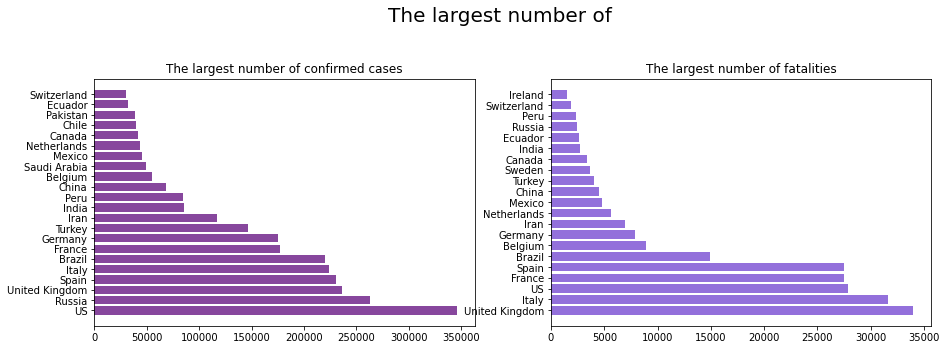

In [15]:
largest_confirm = w4_train.nlargest(1000,'ConfirmedCases')
largest_fatilities = w4_train.nlargest(1000,'Fatalities')

plt.figure(figsize=(15,10))
plt.suptitle('The largest number of',fontsize=20)

plt.subplot(221)
plt.title('The largest number of confirmed cases')
plt.barh(largest_confirm['Country_Region'],largest_confirm['ConfirmedCases'],color ='#87479d');

plt.subplot(222)
plt.title('The largest number of fatalities')
plt.barh(largest_fatilities['Country_Region'],largest_fatilities['Fatalities'],color = '#9370db');
